## Import Libraries

In [206]:
import numpy as np # use numpy library to manipulate array easily
import pandas as pd # use pandas library to access csv file
import matplotlib.pyplot as plt  #use matplotlib library to easily make graph   
from matplotlib.legend_handler import HandlerBase  # use texthandler for legend plotting
from matplotlib.text import Text 
import seaborn as sns      # in order to use seaborn function count plot
from sklearn.model_selection import train_test_split # for train test split
import tensorflow as tf # for creating the NN model

sns.set_style('darkgrid')  #set the seaborn plot style to 'darkgrid'

## **Import the data**

In [207]:
data=pd.read_csv('divorce_data.csv',sep=';') 
data

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


In [208]:
data.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


## To seperate data and labels

In [209]:
y = data['Divorce'].copy() # Y represents output
X = data.drop('Divorce', axis=1).copy() # X represent data

## Make the graph to represent the percentage for each Question

In [210]:
def without_hue(plot, feature): # plot percentage above each patch
    total = len(feature) # get the number record of each feature
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # compute percentage of each xtick label of patch
        x = p.get_x() + p.get_width() / 4
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12) # note percentage on the figure
    plt.show()

class TextHandler(HandlerBase): # text handler for legend plotting
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold") # set parameters of text in legend
        return [tx]

# commenting out drawing the plots
# i = 0 # iterating over 54 columns and plot graphics
# for column in data.columns[:-1]: # data.columns[:-1] represents 'Q1'~ 'Q54', except last column y
#     fig = plt.figure()
#     ax = sns.countplot(x=column, data=X) # seaborn countplot
    
#     handltext = [str(elem) for elem in np.arange(5)] # ["0", "1", "2", "3", "4"]
#     labels=["Never","Seldom","Averagely","Frequently","Always"]
#     t = ax.get_xticklabels() # get X-axis labels
#     labeldic = dict(zip(handltext, labels)) # zip handled text and labels to a dictionary
#     labels = [labeldic[h.get_text()]  for h in t]
#     handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,ax.patches)] # make Handltext(xticklabels) and patches into tuples 

#     ax.legend(handles, labels, handler_map={tuple : TextHandler()}) # the legend of seaborn. countplot 
    
#     without_hue(ax, data[column]) # pass the graph and each column from the dataset
#     # fig.savefig('ML_divorce_rate_dataset_plot'+ str(i)+'.jpg') 
#     # save figure plotted to a determined local directory
    
#     i += 1

## Split the dataset
Split the dataset into train (70%), test (15%) and cross validation (15%) sets

In [211]:
X_train, X_2, y_train, y_2 = train_test_split(X, y, test_size=0.3)
X_test, X_cv, y_test, y_cv = train_test_split(X_2, y_2, test_size=0.5)

# print the dataset sizes
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
print(X_cv.shape, y_cv.shape)

(119, 54) (119,)
(25, 54) (25,)
(26, 54) (26,)


## Creating the Neural Network model using Tensorflow

In [212]:
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(54,)), # 54 input features
    tf.keras.layers.Dense(64, activation='relu'), # hidden layer with 128 hidden units
    
#     tf.keras.layers.Dropout(0.2), # regularization. Do later
    
    tf.keras.layers.Dense(1) # output layer has 1 unit because this is binary classification 
])

model.summary() # display a summary of the model

Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_211 (Dense)            (None, 64)                3520      
_________________________________________________________________
dense_212 (Dense)            (None, 1)                 65        
Total params: 3,585
Trainable params: 3,585
Non-trainable params: 0
_________________________________________________________________


Loss function and optimizer settings

In [213]:
loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Fit the parameters to the model

Epoch 1/10
3/3 [==============================] - 1s 72ms/step - loss: 0.6054 - accuracy: 0.6737 - val_loss: 0.3908 - val_accuracy: 0.8333
Epoch 2/10
3/3 [==============================] - 0s 10ms/step - loss: 0.4186 - accuracy: 0.8737 - val_loss: 0.3129 - val_accuracy: 0.8750
Epoch 3/10
3/3 [==============================] - 0s 9ms/step - loss: 0.3716 - accuracy: 0.9053 - val_loss: 0.2761 - val_accuracy: 0.9167
Epoch 4/10
3/3 [==============================] - 0s 10ms/step - loss: 0.3310 - accuracy: 0.9368 - val_loss: 0.2412 - val_accuracy: 0.9583
Epoch 5/10
3/3 [==============================] - 0s 10ms/step - loss: 0.2866 - accuracy: 0.9579 - val_loss: 0.2090 - val_accuracy: 0.9583
Epoch 6/10
3/3 [==============================] - 0s 10ms/step - loss: 0.2513 - accuracy: 0.9684 - val_loss: 0.1813 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 0s 9ms/step - loss: 0.2187 - accuracy: 0.9684 - val_loss: 0.1612 - val_accuracy: 0.9583
Epoch 8/10
3/3 [=============

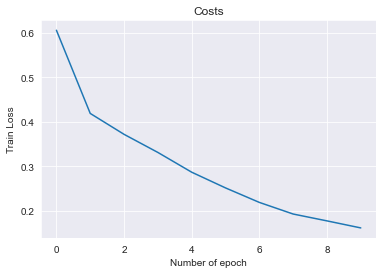

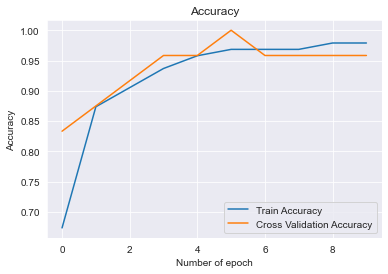

In [214]:
loss=model.fit(X_train, y_train, epochs=10,validation_split=0.2)
loss_train=loss.history['loss']
accuracy_train=loss.history['accuracy']
accuracy_val=loss.history['val_accuracy']
plt.plot(loss_train) #plot cost
plt.xlabel("Number of epoch")
plt.ylabel("Train Loss")
plt.title('Costs')
plt.show() 
plt.plot(accuracy_train) #plot accuracies
plt.plot(accuracy_val) #plot accuracies
plt.xlabel("Number of epoch")
plt.ylabel("Accuracy")
plt.legend(["Train Accuracy", "Cross Validation Accuracy"], loc ="lower right")
plt.title('Accuracy')
plt.show()


# **Model Evaluation**

In [215]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=64)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(X_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
1/1 [==============================] - 0s 12ms/step - loss: 0.2194 - accuracy: 0.9200
test loss, test acc: [0.2193518877029419, 0.9200000166893005]
Generate predictions for 3 samples
predictions shape: (3, 1)


# **Study the impact of different numbers of units on each layer on predict accuracy**


In [216]:
# Number of units selection
# set up the parameters of units
Units = [16, 32, 48, 64, 80, 96, 112, 128]
Results = np.zeros(8)

for i in range(len(Units)):
    # create the training model
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(54,)), # 54 input features
        tf.keras.layers.Dense(Units[i], activation='relu'), # hidden layer 1 with N hidden units

    #     tf.keras.layers.Dropout(0.2), # regularization. Do later

        tf.keras.layers.Dense(1) # output layer has 1 unit because this is binary classification 
    ])

    # set up the loss function and optimizer
    loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

    model.compile(optimizer='adam',
                  loss=loss_fn,
                  metrics=['accuracy'])

    # fit the model with the training set
    model.fit(X_train, y_train, epochs=5)
    
    # Evaluate the model on the test data using `evaluate`
    print("Evaluate on test data")
    _, Results[i] = model.evaluate(X_cv, y_cv, batch_size=64)
    print("test acc:", Results[i])
    

Epoch 1/5
4/4 [==============================] - 0s 1ms/step - loss: 0.5478 - accuracy: 0.7815
Epoch 2/5
4/4 [==============================] - 0s 1ms/step - loss: 0.4809 - accuracy: 0.8067
Epoch 3/5
4/4 [==============================] - 0s 1ms/step - loss: 0.4210 - accuracy: 0.8403
Epoch 4/5
4/4 [==============================] - 0s 1ms/step - loss: 0.3727 - accuracy: 0.8571
Epoch 5/5
4/4 [==============================] - 0s 1ms/step - loss: 0.3280 - accuracy: 0.8908
Evaluate on test data
1/1 [==============================] - 0s 92ms/step - loss: 0.2904 - accuracy: 0.9615
test acc: 0.9615384340286255
Epoch 1/5
4/4 [==============================] - 0s 2ms/step - loss: 0.7026 - accuracy: 0.5798
Epoch 2/5
4/4 [==============================] - 0s 1ms/step - loss: 0.4622 - accuracy: 0.8319
Epoch 3/5
4/4 [==============================] - 0s 1ms/step - loss: 0.4081 - accuracy: 0.8655
Epoch 4/5
4/4 [==============================] - 0s 1ms/step - loss: 0.3671 - accuracy: 0.8992
Epoch 5/

# **The accuracy corresponding to the different number of units in each layer**

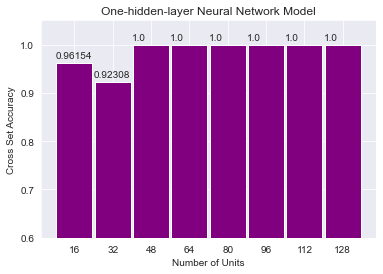

In [217]:
x_labels = ['16', '32', '48','64', '80', '96', '112', '128']
units_plot = plt.bar(Units, Results, color='purple',width=15, tick_label=x_labels) # plot the bar chart
Results_cp = np.round(Results, 5) # round the test result

# Text on the top of each bar
for i in range(len(Units)):
    plt.text(x = Units[i]-8 , y = Results[i]+0.01, s = Results_cp[i], size = 10)

plt.ylim(ymin=0.6) # limit the y-axis minimum to 0.6
plt.xlabel("Number of Units")
plt.ylabel("Cross Set Accuracy")
plt.title("One-hidden-layer Neural Network Model")
plt.savefig('ML_divorce_rate_units_selection_1.jpg') 

# **Two-hidden-layer with 32 Units in the First Hidden Layer Neural Network Model,Study the impact of different numbers of units on second layer on predict accuracy.**

In [218]:
# hidden layers selection
# 32 units in hidden layer 1
# set up the parameters of units in hidden layer 2
layer2_Units = [2, 4, 8, 16, 24, 32]
layer2_Results = np.zeros(6)

for i in range(len(layer2_Units)):
    # create the training model
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(54,)), # 54 input features
        tf.keras.layers.Dense(32, activation='relu'), # 32 units in hidden layer 1
        tf.keras.layers.Dense(layer2_Units[i], activation='relu'), # hidden layer 2 with N hidden units

    #     tf.keras.layers.Dropout(0.2), # regularization. Do later

        tf.keras.layers.Dense(1) # output layer has 1 unit because this is binary classification 
    ])

    # set up the loss function and optimizer
    loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

    model.compile(optimizer='adam',
                  loss=loss_fn,
                  metrics=['accuracy'])




    # Evaluate the model on the test data using `evaluate`
    print("Evaluate on test data")
    _, layer2_Results[i] = model.evaluate(X_cv, y_cv, batch_size=64)
    print("test acc:", layer2_Results[i])

Evaluate on test data
1/1 [==============================] - 0s 128ms/step - loss: 0.5036 - accuracy: 0.8846
test acc: 0.8846153616905212
Evaluate on test data
1/1 [==============================] - 0s 139ms/step - loss: 0.9217 - accuracy: 0.4615
test acc: 0.4615384638309479
Evaluate on test data
1/1 [==============================] - 0s 148ms/step - loss: 1.7426 - accuracy: 0.4615
test acc: 0.4615384638309479
Evaluate on test data
1/1 [==============================] - 0s 203ms/step - loss: 0.5819 - accuracy: 0.7692
test acc: 0.7692307829856873
Evaluate on test data
1/1 [==============================] - 0s 174ms/step - loss: 1.3905 - accuracy: 0.4615
test acc: 0.4615384638309479
Evaluate on test data
1/1 [==============================] - 0s 182ms/step - loss: 1.1534 - accuracy: 0.4615
test acc: 0.4615384638309479


# **The accuracy corresponding to the different number of units in sencond layer(First layer 32 units)**

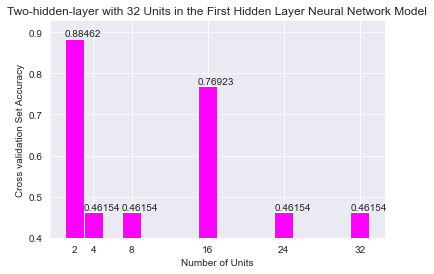

In [219]:
x_labels2 = ['2', '4', '8', '16', '24', '32']
units_plot2 = plt.bar(layer2_Units, layer2_Results, color='magenta',width=2, tick_label=x_labels2) # plot the bar chart
Results_cp2 = np.round(layer2_Results, 5) # round the test result

# Text on the top of each bar
for i in range(len(layer2_Units)):
    plt.text(x = layer2_Units[i]-1 , y = layer2_Results[i]+0.005, s = Results_cp2[i], size = 10)

plt.ylim(ymin=0.4) # limit the y-axis minimum to 0.4
plt.xlabel("Number of Units")
plt.ylabel("Cross validation Set Accuracy")
plt.title("Two-hidden-layer with 32 Units in the First Hidden Layer Neural Network Model")
plt.savefig('ML_divorce_rate_hidden_layer_selection.jpg')

# **Two-hidden-layer with 48 Units in the First Hidden Layer Neural Network Model,Study the impact of different numbers of units on second layer on predict accuracy.**

In [220]:
# hidden layers selection
# 48 units in hidden layer 1
# set up the parameters of units in hidden layer 2
layer2_Units_2 = [2, 4, 8, 16, 24, 32, 48]
layer2_Results_2 = np.zeros(7)

for i in range(len(layer2_Units_2)):
    # create the training model
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(54,)), # 54 input features
        tf.keras.layers.Dense(48, activation='relu'), # 48 units in hidden layer 1
        tf.keras.layers.Dense(layer2_Units_2[i], activation='relu'), # hidden layer 2 with N hidden units

    #     tf.keras.layers.Dropout(0.2), # regularization. Do later

        tf.keras.layers.Dense(1) # output layer has 1 unit because this is binary classification 
    ])

    # set up the loss function and optimizer
    loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

    model.compile(optimizer='adam',
                  loss=loss_fn,
                  metrics=['accuracy'])

    # fit the model with the training set
    model.fit(X_train, y_train, epochs=5)
    
    # Evaluate the model on the test data using `evaluate`
    print("Evaluate on test data")
    _, layer2_Results_2[i] = model.evaluate(X_cv, y_cv, batch_size=64)
    print("test acc:", layer2_Results_2[i])

Epoch 1/5
4/4 [==============================] - 0s 998us/step - loss: 0.8062 - accuracy: 0.5630
Epoch 2/5
4/4 [==============================] - 0s 1ms/step - loss: 0.6247 - accuracy: 0.6723
Epoch 3/5
4/4 [==============================] - 0s 1ms/step - loss: 0.4962 - accuracy: 0.8235
Epoch 4/5
4/4 [==============================] - 0s 2ms/step - loss: 0.3971 - accuracy: 0.8908
Epoch 5/5
4/4 [==============================] - 0s 1ms/step - loss: 0.3266 - accuracy: 0.9412
Evaluate on test data
1/1 [==============================] - 0s 96ms/step - loss: 0.2192 - accuracy: 1.0000
test acc: 1.0
Epoch 1/5
4/4 [==============================] - 1s 2ms/step - loss: 0.7793 - accuracy: 0.5126
Epoch 2/5
4/4 [==============================] - 0s 1ms/step - loss: 0.5075 - accuracy: 0.7143
Epoch 3/5
4/4 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.9412
Epoch 4/5
4/4 [==============================] - 0s 997us/step - loss: 0.3797 - accuracy: 0.9664
Epoch 5/5
4/4 [====

# **The accuracy corresponding to the different number of units in sencond layer(First layer 48 units)**

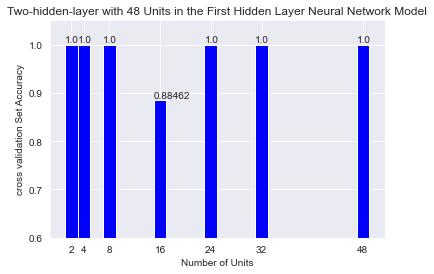

In [221]:
x_labels3 = ['2', '4', '8', '16', '24', '32', '48']
units_plot3 = plt.bar(layer2_Units_2, layer2_Results_2, color='blue',width=2, tick_label=x_labels3) # plot the bar chart
Results_cp3 = np.round(layer2_Results_2, 5) # round the test result

# Text on the top of each bar
for i in range(len(layer2_Units_2)):
    plt.text(x = layer2_Units_2[i]-1 , y = layer2_Results_2[i]+0.005, s = Results_cp3[i], size = 10)

plt.ylim(ymin=0.6) # limit the y-axis minimum to 0.6
plt.xlabel("Number of Units")
plt.ylabel("cross validation Set Accuracy")
plt.title("Two-hidden-layer with 48 Units in the First Hidden Layer Neural Network Model")
plt.savefig('ML_divorce_rate_hidden_layer_selection2.jpg')

# **Two-hidden-layer with 64 Units in the First Hidden Layer Neural Network Model,Study the impact of different numbers of units on second layer on predict accuracy.**

In [222]:
# hidden layers selection
# 64 units in hidden layer 1
# set up the parameters of units in hidden layer 2
layer2_Units_3 = [2, 4, 8, 16, 32, 64]
layer2_Results_3 = np.zeros(6)

for i in range(len(layer2_Units_3)):
    # create the training model
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(54,)), # 54 input features
        tf.keras.layers.Dense(64, activation='relu'), # 64 units in hidden layer 1
        tf.keras.layers.Dense(layer2_Units_3[i], activation='relu'), # hidden layer 2 with N hidden units

    #     tf.keras.layers.Dropout(0.2), # regularization. Do later

        tf.keras.layers.Dense(1) # output layer has 1 unit because this is binary classification 
    ])

    # set up the loss function and optimizer
    loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

    model.compile(optimizer='adam',
                  loss=loss_fn,
                  metrics=['accuracy'])

    # fit the model with the training set
    model.fit(X_train, y_train, epochs=5)
    
    # Evaluate the model on the test data using `evaluate`
    print("Evaluate on test data")
    _, layer2_Results_3[i] = model.evaluate(X_cv, y_cv, batch_size=64)
    print("test acc:", layer2_Results_3[i])

Epoch 1/5
4/4 [==============================] - 0s 2ms/step - loss: 0.8567 - accuracy: 0.4958
Epoch 2/5
4/4 [==============================] - 0s 2ms/step - loss: 0.5669 - accuracy: 0.8319
Epoch 3/5
4/4 [==============================] - 0s 997us/step - loss: 0.4555 - accuracy: 0.9328
Epoch 4/5
4/4 [==============================] - 0s 2ms/step - loss: 0.4276 - accuracy: 0.9412
Epoch 5/5
4/4 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.9496
Evaluate on test data
1/1 [==============================] - 0s 121ms/step - loss: 0.3277 - accuracy: 1.0000
test acc: 1.0
Epoch 1/5
4/4 [==============================] - 0s 2ms/step - loss: 0.7826 - accuracy: 0.5126
Epoch 2/5
4/4 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.5882
Epoch 3/5
4/4 [==============================] - 0s 2ms/step - loss: 0.5902 - accuracy: 0.6387
Epoch 4/5
4/4 [==============================] - 0s 1ms/step - loss: 0.5302 - accuracy: 0.7815
Epoch 5/5
4/4 [=====

# **The accuracy corresponding to the different number of units in sencond layer(First layer 64 units)**

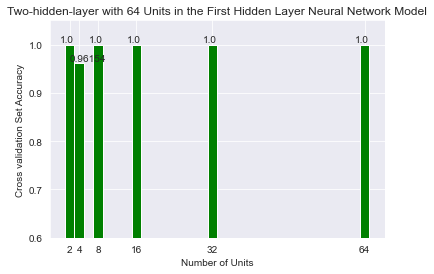

In [223]:
x_labels4 = ['2', '4', '8', '16', '32', '64']
units_plot4 = plt.bar(layer2_Units_3, layer2_Results_3, color='Green',width=2, tick_label=x_labels4) # plot the bar chart
Results_cp4 = np.round(layer2_Results_3, 5) # round the test result

# Text on the top of each bar
for i in range(len(layer2_Units_3)):
    plt.text(x = layer2_Units_3[i]-2 , y = layer2_Results_3[i]+0.005, s = Results_cp4[i], size = 10)

plt.ylim(ymin=0.6) # limit the y-axis minimum to b0.6
plt.xlabel("Number of Units")
plt.ylabel("Cross validation Set Accuracy")
plt.title("Two-hidden-layer with 64 Units in the First Hidden Layer Neural Network Model")
plt.savefig('ML_divorce_rate_hidden_layer_selection3.jpg')

# **One-hidden-layer with 64 Units Neural Network Model,Study the impact of different regularization value on predict accuracy.**

In [224]:
# hidden layers selection
# 64 units in hidden layer 1
# set up the parameters of units in hidden layer 2
layer2_Results= np.zeros(6)
RegularizationTerm = [0.001, 0.01, 0.1, 0.3, 0.7, 0.9]


# create the training model
for i in range(len(RegularizationTerm)):
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(54,)), # 54 input features
        tf.keras.layers.Dense(64, activation='relu'), # 64 units in hidden layer 1
        tf.keras.layers.Dropout(RegularizationTerm[i]), # regularization. 

        tf.keras.layers.Dense(1) # output layer has 1 unit because this is binary classification 
    ])

    # set up the loss function and optimizer
    loss_fn = tf.keras.losses.BinaryCrossentropy(from_logits=True)

    model.compile(optimizer='adam',
                      loss=loss_fn,
                      metrics=['accuracy'])

    # fit the model with the training set
    model.fit(X_train, y_train, epochs=5)

     # Evaluate the model on the test data using `evaluate`
    print("Evaluate on test data")
    _, layer2_Results[i]= model.evaluate(X_cv, y_cv, batch_size=64)
    print("test acc:", layer2_Results[i])

Epoch 1/5
4/4 [==============================] - 0s 2ms/step - loss: 1.6789 - accuracy: 0.3866
Epoch 2/5
4/4 [==============================] - 0s 2ms/step - loss: 0.7172 - accuracy: 0.5714
Epoch 3/5
4/4 [==============================] - 0s 2ms/step - loss: 0.6022 - accuracy: 0.6639
Epoch 4/5
4/4 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.7059
Epoch 5/5
4/4 [==============================] - 0s 2ms/step - loss: 0.4844 - accuracy: 0.8151
Evaluate on test data
1/1 [==============================] - 0s 100ms/step - loss: 0.4016 - accuracy: 0.8462
test acc: 0.8461538553237915
Epoch 1/5
4/4 [==============================] - 0s 1ms/step - loss: 0.5029 - accuracy: 0.8571
Epoch 2/5
4/4 [==============================] - 0s 1ms/step - loss: 0.4026 - accuracy: 0.8908
Epoch 3/5
4/4 [==============================] - 0s 2ms/step - loss: 0.3339 - accuracy: 0.9244
Epoch 4/5
4/4 [==============================] - 0s 2ms/step - loss: 0.2655 - accuracy: 0.9664
Epoch 5

# **The accuracy corresponding to the different regularization value**


Text(0.5, 1.0, 'Two-hidden-layer with 64 Units in the First Hidden Layer Neural Network Model')

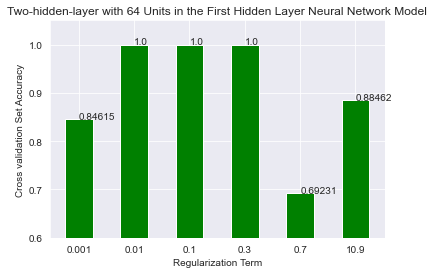

In [226]:
X = [1, 2, 3, 4, 5, 6]
RegularizationTerm = [0.001, 0.01, 0.1, 0.3, 0.7, 10.9]
units_plot5 = plt.bar(X, layer2_Results, color='Green',width=0.5, tick_label=RegularizationTerm) # plot the bar chart
Results_cp5 = np.round(layer2_Results,5) # round the test result


# Text on the top of each bar
for i in range(len(RegularizationTerm)):
    plt.text(x = X[i], y = layer2_Results[i], s = Results_cp5[i], size = 10)

plt.ylim(ymin=0.6) # limit the y-axis minimum to b0.6
plt.xlabel("Regularization Term")
plt.ylabel("Cross validation Set Accuracy")
plt.title("Two-hidden-layer with 64 Units in the First Hidden Layer Neural Network Model")